<a href="https://colab.research.google.com/github/aifajar/eratani_ml_path/blob/main/Model_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [2]:
url = 'https://raw.githubusercontent.com/aifajar/eratani_ml_path/main/Climate_Sby_2013-2021.csv'


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

df = pd.read_csv(url, header=0, parse_dates=[0], date_parser=dateparse)

dataset = df[['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg']]

dataset = dataset.fillna(method ='pad')

dataset.head(15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Tanggal,Tn,Tx,Tavg,RH_avg
0,2013-01-01,24.0,34.3,27.6,85.0
1,2013-01-02,24.0,32.6,27.7,86.0
2,2013-01-03,26.0,32.9,28.2,83.0
3,2013-01-04,25.0,32.8,28.1,82.0
4,2013-01-05,25.0,30.0,27.3,86.0
5,2013-01-06,25.0,33.0,27.9,81.0
6,2013-01-07,25.0,32.6,28.1,82.0
7,2013-01-08,26.0,33.1,28.7,75.0
8,2013-01-09,26.0,31.4,28.1,77.0
9,2013-01-10,26.0,33.9,29.7,71.0


In [4]:
dataset['Tanggal'].dtype

dtype('<M8[ns]')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3077 non-null   datetime64[ns]
 1   Tn       3077 non-null   float64       
 2   Tx       3077 non-null   float64       
 3   Tavg     3077 non-null   float64       
 4   RH_avg   3077 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 120.3 KB


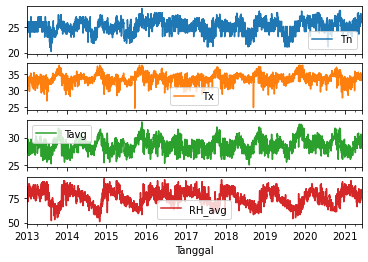

In [6]:
plot_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg']
plot_features = dataset[plot_cols]
plot_features.index = dataset['Tanggal']
_ = plot_features.plot(subplots=True)

In [7]:
train_df,test_df = dataset[1:2304], dataset[2304:] 

In [8]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [9]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [10]:
n_past = 30
n_future = 28 
n_features = 5

In [11]:
dataset.shape

(3077, 5)

In [12]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [13]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 5)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100), (None, 42400       input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 28, 100)      0           lstm[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 28, 100)      80400       repeat_vector[0][0]              
                                                                 lstm[0][1]            

In [14]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 30, 5)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 30, 100), (N 42400       input_2[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 100), (None, 80400       lstm_2[0][0]                     
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 28, 100)      0           lstm_3[0][0]                     
_______________________________________________________________________________________

In [22]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [23]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

In [24]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [25]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,29):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()
  print()

Tanggal
Day  1 :
MAE-E1D1 :  6.406260989922004e+35, MAE-E2D2 :  6.963951831246097e+35
Day  2 :
MAE-E1D1 :  6.870702013411412e+35, MAE-E2D2 :  7.103550564403581e+35
Day  3 :
MAE-E1D1 :  6.944250348715219e+35, MAE-E2D2 :  7.124931068518712e+35
Day  4 :
MAE-E1D1 :  6.954556786209154e+35, MAE-E2D2 :  7.127818962630622e+35
Day  5 :
MAE-E1D1 :  6.955926238283781e+35, MAE-E2D2 :  7.128140904423336e+35
Day  6 :
MAE-E1D1 :  6.956046044247458e+35, MAE-E2D2 :  7.12811029970402e+35
Day  7 :
MAE-E1D1 :  6.95599081793814e+35, MAE-E2D2 :  7.128033014548058e+35
Day  8 :
MAE-E1D1 :  6.955908531227784e+35, MAE-E2D2 :  7.12794713712e+35
Day  9 :
MAE-E1D1 :  6.955823780256003e+35, MAE-E2D2 :  7.12786118444732e+35
Day  10 :
MAE-E1D1 :  6.955738066595656e+35, MAE-E2D2 :  7.127775287101568e+35
Day  11 :
MAE-E1D1 :  6.955652154864904e+35, MAE-E2D2 :  7.127689511475061e+35
Day  12 :
MAE-E1D1 :  6.955566235388381e+35, MAE-E2D2 :  7.127603554376226e+35
Day  13 :
MAE-E1D1 :  6.95548031480532e+35, MAE-E2D2 :  7.12

In [26]:
pred_e1d1

array([[[7.9870449e+35, 5.4053296e+02, 1.5504053e+03, 5.2655530e+02,
         3.1362453e+04],
        [8.4515398e+35, 5.6634186e+02, 1.6392510e+03, 5.5892340e+02,
         3.3344539e+04],
        [8.5251674e+35, 5.7043274e+02, 1.6533477e+03, 5.6406903e+02,
         3.3658766e+04],
        ...,
        [8.5372560e+35, 5.7110400e+02, 1.6556631e+03, 5.6491461e+02,
         3.3710398e+04],
        [8.5372560e+35, 5.7110400e+02, 1.6556631e+03, 5.6491461e+02,
         3.3710398e+04],
        [8.5372560e+35, 5.7110400e+02, 1.6556631e+03, 5.6491461e+02,
         3.3710398e+04]],

       [[7.9870441e+35, 5.4053302e+02, 1.5504050e+03, 5.2655518e+02,
         3.1362451e+04],
        [8.4515398e+35, 5.6634186e+02, 1.6392510e+03, 5.5892340e+02,
         3.3344539e+04],
        [8.5251674e+35, 5.7043274e+02, 1.6533477e+03, 5.6406903e+02,
         3.3658766e+04],
        ...,
        [8.5372560e+35, 5.7110400e+02, 1.6556631e+03, 5.6491461e+02,
         3.3710395e+04],
        [8.5372560e+35, 5.711040

In [34]:
##saving model to bucket
BUCKET = 'first-cloud-step-308017.appspot.com'
path="gs://%s/keras-job-dir/keras_export" % BUCKET

model_e1d1.save(path) #save your model 


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: gs://first-cloud-step-308017.appspot.com/keras-job-dir/keras_export/assets


In [35]:

# to reload model 
model = tf.keras.models.load_model(path)
